In [142]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import recall_score, accuracy_score, cohen_kappa_score, f1_score
from sklearn.model_selection import KFold

In [309]:
df=pd.read_csv("bank-additional-full.csv", sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [206]:
df.shape

(41188, 21)

In [5]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [310]:
df.pdays = df.pdays.replace({999:28})

In [311]:
df.pdays = pd.cut(df.pdays, bins=[0,10,20,27,29],
       labels=['<10','11-20','21-27','28'])

In [312]:
df.pdays = df.pdays.astype('object')

In [313]:
df.previous = df.previous.astype('object')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41173 non-null  object 
 13  previous        41188 non-null  object 
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [314]:
df_cat = df.select_dtypes(include = 'object')
df_nu = df.select_dtypes(exclude = 'object')

In [213]:
df_nu.skew()

age               0.784697
duration          3.263141
campaign          4.762507
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

In [315]:
s = df_nu.skew()[(df_nu.skew()>1)|(df_nu.skew()<-1)]
s

duration       3.263
campaign       4.763
nr.employed   -1.044
dtype: float64

In [215]:
from sklearn.preprocessing import PowerTransformer

In [316]:
PT = PowerTransformer(method = 'yeo-johnson')

In [317]:
df['duration'] = PT.fit_transform(df[['duration']])
df['campaign'] = PT.fit_transform(df[['campaign']])
df['nr.employed'] = PT.fit_transform(df[['nr.employed']])

In [318]:
from sklearn.preprocessing import LabelEncoder
LL = LabelEncoder()

In [319]:
for i in df_cat:
  df[i] = LL.fit_transform(df[[i]])

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  int32  
 13  previous        41188 non-null  int32  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Model Building 

In [221]:
# Libraries to tune model, get different metric scores, and split data

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier
import sklearn.metrics as metrics

# to suppress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [320]:
score_card = pd.DataFrame(columns=['Model','Approach','Precision Score', 'Recall Score','Accuracy Score', 'Kappa Score', 'f1-score'])

In [321]:
def update_score_card(model, model_name,a):
    y_pred = model.predict(xtest_s)
    global score_card
    score_card = score_card.append({'Model': model_name,'Approach':a,
                                    'Precision Score': metrics.precision_score(ytest_s, y_pred, average='macro'),
                                    'Recall Score': metrics.recall_score(ytest_s, y_pred, average='macro'),
                                    'Accuracy Score': metrics.accuracy_score(ytest_s, y_pred),
                                    'Kappa Score': metrics.cohen_kappa_score(ytest_s, y_pred),
                                    'f1-score': metrics.f1_score(ytest_s, y_pred, average='macro')}, 
                                    ignore_index = True)

In [322]:
score_card

,Model,Approach,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score


## Models with stratify

In [375]:
X = df.drop('y', axis=1)
y = df['y']
xtrain_s, xtest_s, ytrain_s, ytest_s = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

In [376]:
SS = StandardScaler()

xtrain_s = pd.DataFrame(SS.fit_transform(xtrain_s), columns= xtrain_s.columns, index= xtrain_s.index)
xtest_s = pd.DataFrame(SS.transform(xtest_s), columns= xtest_s.columns, index= xtest_s.index)
Xc_train=sm.add_constant(xtrain_s)
Xc_test=sm.add_constant(xtest_s)

In [377]:
xtrain_s.shape,xtest_s.shape,ytrain_s.shape,ytest_s.shape

((28831, 20), (12357, 20), (28831,), (12357,))

## Logistic Regression Model

In [378]:
logreg_s=sm.Logit(ytrain_s,Xc_train).fit()
logreg_s.summary()

Optimization terminated successfully.
         Current function value: 0.202294
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28810
Method:                           MLE   Df Model:                           20
Date:                Wed, 12 Oct 2022   Pseudo R-squ.:                  0.4254
Time:                        16:26:14   Log-Likelihood:                -5832.3
converged:                       True   LL-Null:                       -10149.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.5520      0.044    -80.107      0.000      -3.639      -3.465
age                0.0410      0.024      1.708      0.088      -0.006       0.088
job                0.0442      0.024      1.831      0.067      -0.003       0.092
marital            0.0561      0.026      2.118      0.034       0.004       0.108
education          0.1381      0.025      5.433      0.000       0.088       0.188
default           -0.1598      0.031     -5.129      0.000      -0.221      -0.099
housing            0.0099      0.024      0.406      0.685      -0.038       0.057
loan              -0.0119      0.024     -0.488      0.625      -0.060       0.036
contact           -0.3908      0.037    -10.551      0.000      -0.463      -0.318
month             -0.1544      0.025     -6.270      0.000      -0.203      -0.106
day_of_week        0.0716      0.025      2.921      0.003       0.024       0.120
duration           1.7758      0.033     54.431      0.000       1.712       1.840
campaign          -0.0597      0.027     -2.245      0.025      -0.112      -0.008
pdays              0.0181      0.018      1.016      0.310      -0.017       0.053
previous           0.1189      0.022      5.425      0.000       0.076       0.162
poutcome           0.3246      0.021     15.308      0.000       0.283       0.366
emp.var.rate      -1.6786      0.135    -12.472      0.000      -1.942      -1.415
cons.price.idx     0.8495      0.052     16.483      0.000       0.749       0.951
cons.conf.idx      0.3231      0.025     13.051      0.000       0.275       0.372
euribor3m         -0.1234      0.172     -0.718      0.473      -0.460       0.214
nr.employed        0.2438      0.134      1.821      0.069      -0.019       0.506
==================================================================================
"""

In [28]:
print("AIC",logreg_s.aic)

AIC 11788.053265503173


In [379]:
df_odds = pd.DataFrame(np.exp(logreg_s.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
const,0.029
age,1.042
job,1.045
marital,1.058
education,1.148
default,0.852
housing,1.010
loan,0.988
contact,0.676
month,0.857


In [30]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob_lr = logreg_s.predict(Xc_test)

# print the y_pred_prob
y_pred_prob_lr.head()

29491   0.013
15052   0.080
36801   0.187
37652   0.105
36392   0.095
dtype: float64

In [31]:
y_pred_S_lr = [ 0 if x < 0.6 else 1 for x in y_pred_prob_lr]

In [32]:
y_pred_S_lr[0:5]

[0, 0, 0, 0, 0]

In [33]:
from sklearn.metrics import precision_score

In [34]:
print(classification_report(ytest_s,y_pred_S_lr))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10965
           1       0.70      0.33      0.45      1392

    accuracy                           0.91     12357
   macro avg       0.81      0.65      0.70     12357
weighted avg       0.90      0.91      0.89     12357



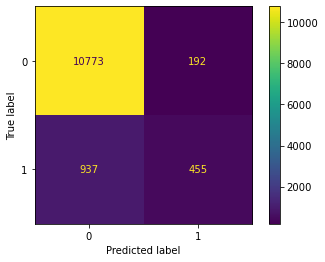

In [35]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_S_lr)

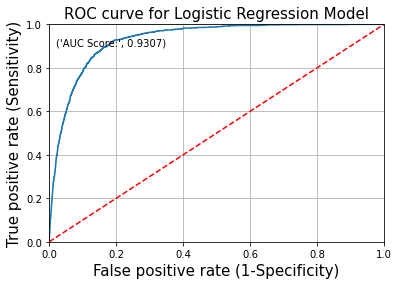

In [36]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_prob_lr)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Logistic Regression Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_prob_lr),4)))
                               
# plot the grid
plt.grid(True)

In [323]:
score_code = score_card.copy()
score_code = score_code.T 
score_code['0'] = ['Logistic Regression_Base Model', 'All Features', round(precision_score(ytest_s, y_pred_S_lr),4), 
                    round(recall_score(ytest_s, y_pred_S_lr),4), round(accuracy_score(ytest_s, y_pred_S_lr),4), 
                    round(cohen_kappa_score(ytest_s, y_pred_S_lr),4), round(f1_score(ytest_s, y_pred_S_lr),4)
                    ]
score_code = score_code.T

In [326]:
score_card=score_code.copy()

In [327]:
score_card

,Model,Approach,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression_Base Model,All Features,0.703,0.327,0.909,0.404,0.446


## Decision Tree Model

In [332]:
decision_tree_classification_S = DecisionTreeClassifier(criterion = 'gini', random_state = 5)

# fit the model using fit() on train data
decision_tree_s = decision_tree_classification_S.fit(xtrain_s, ytrain_s)

In [38]:
y_pred_s_dt = decision_tree_s.predict(xtest_s)

In [39]:
print(classification_report(ytest_s,y_pred_s_dt))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10965
           1       0.50      0.51      0.51      1392

    accuracy                           0.89     12357
   macro avg       0.72      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



In [328]:
update_score_card(decision_tree_s,'Decison Tree','All Features')

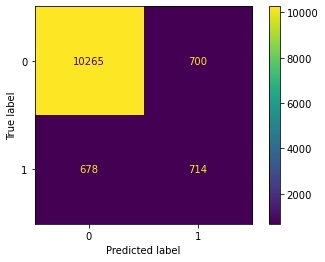

In [41]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_dt,values_format='.5g');

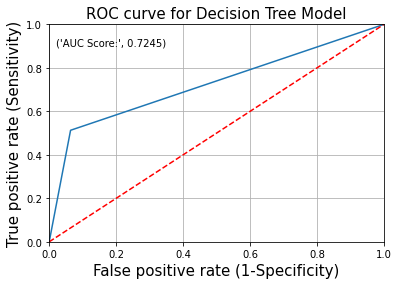

In [42]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_s_dt)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Decision Tree Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_dt),4)))
                               
# plot the grid
plt.grid(True)

## Cross validation for Decision Tree Model

In [147]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(decision_tree_classification_S,xtrain_s,ytrain_s,cv=kf,scoring='accuracy')
dt_be=np.mean(np.abs(cv_score))
dt_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of Decision Tree Model with all features',dt_be)
print('Variance_error of Decision Tree Model with all features',dt_ve)

Bias_error of Decision Tree Model with all features 0.10950320465086265
Variance_error of Decision Tree Model with all features 0.015057146824576829


## Random Forest Model

In [334]:
rf_classification = RandomForestClassifier(random_state = 5)
rf_model = rf_classification.fit(xtrain_s, ytrain_s)

In [44]:
y_pred_s_rf = rf_model.predict(xtest_s)

print(classification_report(ytest_s,y_pred_s_rf))


              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.67      0.51      0.58      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



In [335]:
update_score_card(rf_model,'Random Forest','All Features')

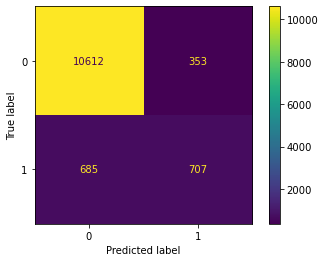

In [46]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_rf,values_format='.5g');

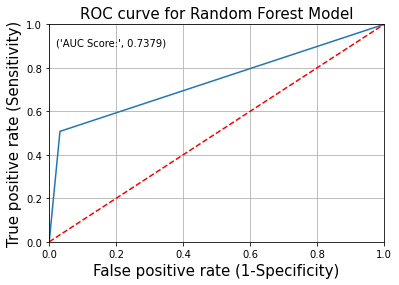

In [47]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_s_rf)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Random Forest Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_rf),4)))
plt.grid(True)


## Cross validation for Random Forest Model

In [149]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(rf_classification ,xtrain_s,ytrain_s,cv=kf,scoring='accuracy')
rf_be=np.mean(np.abs(cv_score))
rf_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of Random Forest Model with all features',rf_be)
print('Variance_error of Random Forest Model with all features',rf_ve)

Bias_error of Random Forest Model with all features 0.136712972776674
Variance_error of Random Forest Model with all features 0.04645737174201168


## KNN Model

In [337]:
knn_classification = KNeighborsClassifier()
knn_model = knn_classification.fit(xtrain_s, ytrain_s)

In [49]:
y_pred_s_kn = rf_model.predict(xtest_s)
print(classification_report(ytest_s,y_pred_s_kn))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.67      0.51      0.58      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



In [338]:
update_score_card(knn_model,'KNN Model','All Features')

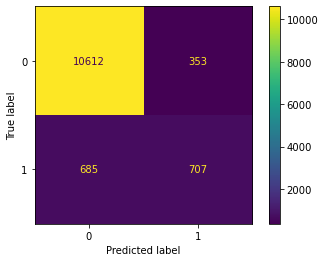

In [51]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_kn,values_format='.5g');

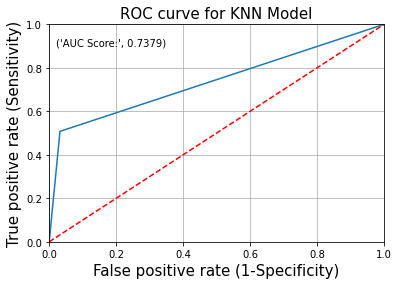

In [52]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_s_kn)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for KNN Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_kn),4)))
plt.grid(True)


## Cross validation for KNN Model

In [150]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(knn_classification,xtrain_s,ytrain_s,cv=kf,scoring='accuracy')
knn_be=np.mean(np.abs(cv_score))
knn_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of KNN Model with all features',knn_be)
print('Variance_error of KNN Model with all features',knn_ve)

Bias_error of Random Forest Model with all features 0.08265917621114571
Variance_error of Random Forest Model with all features 0.025427357360661186


## Naive Bayes Model

In [339]:
gnb = GaussianNB()
gnb_model = gnb.fit(xtrain_s, ytrain_s)


In [54]:
y_pred_s_nb = gnb_model.predict(xtest_s)

print(classification_report(ytest_s,y_pred_s_nb))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     10965
           1       0.38      0.56      0.46      1392

    accuracy                           0.85     12357
   macro avg       0.66      0.72      0.68     12357
weighted avg       0.88      0.85      0.86     12357



In [340]:
update_score_card(gnb_model,'Naive Bayes Model','All Features')

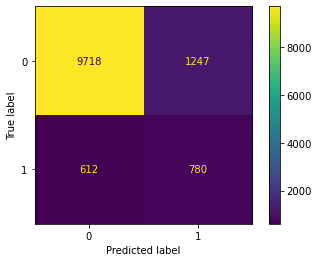

In [56]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_nb)

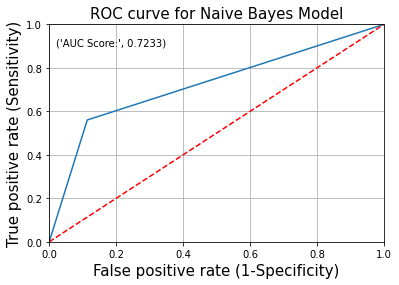

In [57]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_s_nb)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Naive Bayes Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_nb),4)))
plt.grid(True)


## Cross validation for Naive Bayes Model

In [153]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(gnb,xtrain_s,ytrain_s,cv=kf,scoring='accuracy')
nb_be=np.mean(np.abs(cv_score))
nb_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of Naive Bayes Model with all features',nb_be)
print('Variance_error of Naive Bayes Model with all features',nb_ve)

Bias_error of Naive Bayes Model with all features 0.5735645164330107
Variance_error of Naive Bayes Model with all features 0.03959942376788513


## Ada Boost Model

In [58]:
ada = AdaBoostClassifier(random_state = 5)
ada_model=ada.fit(xtrain_s, ytrain_s)

In [59]:
y_pred_s_ad = ada_model.predict(xtest_s)
print(classification_report(ytest_s,y_pred_s_ad))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10965
           1       0.67      0.40      0.50      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.72     12357
weighted avg       0.90      0.91      0.90     12357



In [60]:
update_score_card(ada_model,'Ada Boost Model','All Features')

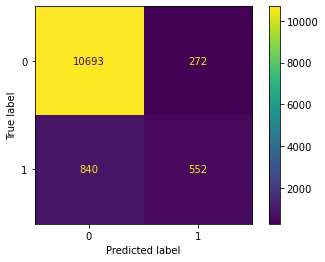

In [61]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_ad);

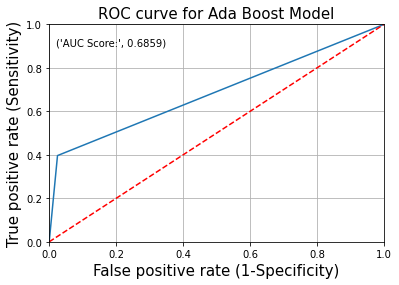

In [62]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_s_ad)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Ada Boost Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_ad),4)))
plt.grid(True)


## Cross validation for Ada Boost Model

In [ ]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(gnb,xtrain_s,ytrain_s,cv=kf,scoring='r2')
nb_be=np.mean(np.abs(cv_score))
nb_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of Ada Boost Model with all features',nb_be)
print('Variance_error of Ada Boost Model with all features',nb_ve)

## XG Boost Model

In [154]:
xgb_s = XGBClassifier()
xgb_model=xgb_s.fit(xtrain_s, ytrain_s)

In [64]:
y_pred_s_xg = xgb_model.predict(xtest_s)
print(classification_report(ytest_s,y_pred_s_xg))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.64      0.54      0.59      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



In [65]:
update_score_card(xgb_model,'XG Boost Model','All Features')

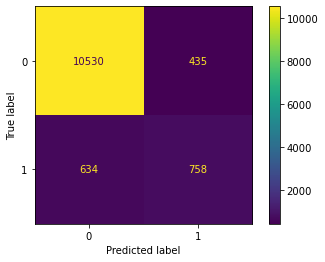

In [66]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_xg);

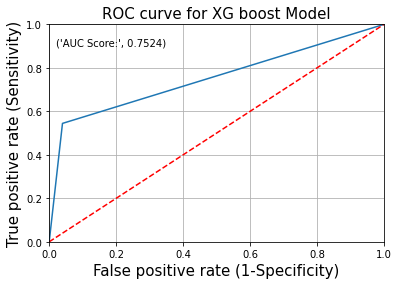

In [67]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_s_xg)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for XG boost Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_xg),4)))
plt.grid(True)

## Cross validation for XG Boost Model

In [155]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(xgb_s,xtrain_s,ytrain_s,cv=kf,scoring='r2')
xg_be=np.mean(np.abs(cv_score))
xg_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of XG Model with all features',xg_be)
print('Variance_error of XG Model with all features',xg_ve)

Bias_error of Naive Bayes Model with all features 0.12771679535182678
Variance_error of Naive Bayes Model with all features 0.0580177430014027


## Gradient Boost Model

In [156]:
gboost_s = GradientBoostingClassifier(random_state = 5)
gboost_model=gboost_s.fit(xtrain_s, ytrain_s)

In [69]:

y_pred_s_gb = gboost_model.predict(xtest_s)

print(classification_report(ytest_s,y_pred_s_gb))


              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.67      0.51      0.58      1392

    accuracy                           0.92     12357
   macro avg       0.80      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



In [70]:
update_score_card(gboost_model,'Gradient Boost Model','All Features')

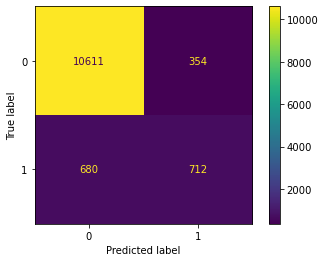

In [71]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_gb);

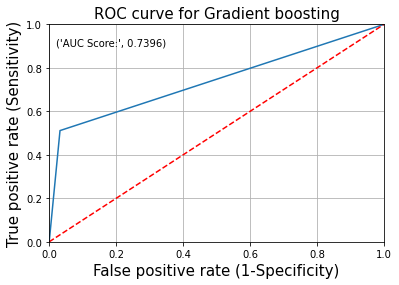

In [72]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_s_gb)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Gradient boosting', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_gb),4)))
plt.grid(True)

## Cross validation for Gradient Boost Model

In [157]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(gboost_s,xtrain_s,ytrain_s,cv=kf,scoring='r2')
gb_be=np.mean(np.abs(cv_score))
gb_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of Gradient Boost Model with all features',gb_be)
print('Variance_error of Gradient Boost Model with all features',gb_ve)

Bias_error of Naive Bayes Model with all features 0.15744724366382506
Variance_error of Naive Bayes Model with all features 0.03436142066737353


## Bagging Classifier

In [227]:
from sklearn.ensemble import BaggingClassifier

In [348]:
bag_classification = BaggingClassifier(random_state = 5)
bag_model = bag_classification.fit(xtrain_s, ytrain_s)


In [233]:
y_pred_s_bag = bag_model.predict(xtest_s)
print(classification_report(ytest_s,y_pred_s_bag))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.62      0.48      0.54      1392

    accuracy                           0.91     12357
   macro avg       0.78      0.72      0.74     12357
weighted avg       0.90      0.91      0.90     12357



In [349]:
update_score_card(bag_model,'Bagging Classifier Model','All Features')

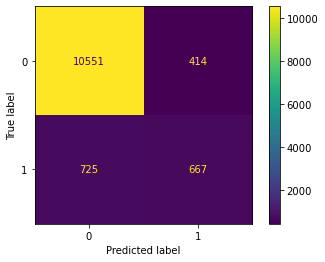

In [230]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_bag,values_format='.5g');

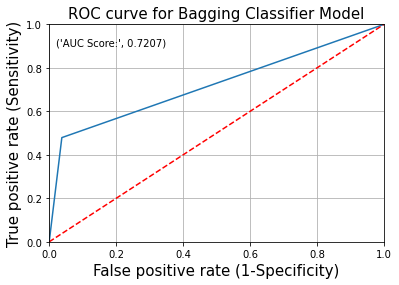

In [234]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_s_bag)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Bagging Classifier Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_bag),4)))
plt.grid(True)

## Cross validation for Bagging Classifier Model

In [232]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(bag_classification ,xtrain_s,ytrain_s,cv=kf,scoring='accuracy')
bag_be=np.mean(np.abs(cv_score))
bag_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of Random Forest Model with all features',bag_be)
print('Variance_error of Random Forest Model with all features',bag_ve)

Bias_error of Random Forest Model with all features 0.07231653334954043
Variance_error of Random Forest Model with all features 0.04222113240339904


# Hyper Parameter Tuning for Random Forest model

In [249]:
param_grid = {
    "n_estimators": [100,150,250,300,350,400],
    "min_samples_leaf": [10,20,30,40,50],
    'criterion' : ['gini', 'entropy'],
    "max_features": [np.arange(0.3, 0.9, 0.1),'sqrt','log2'],
    "max_depth":[2,3,4,5,6,7]
}
rf=RandomForestClassifier()
randomized_cv=RandomizedSearchCV(estimator=rf,param_distributions=param_grid,scoring='accuracy',cv=5,random_state=5)

In [281]:
X = df.drop('y', axis=1)
y = df['y']
Xc=sm.add_constant(xtrain_s)
xtrain_s, xtest_s, ytrain_s, ytest_s = train_test_split(X, y, test_size=0.3, stratify=y, random_state=5)

In [ ]:
random_cv_a=randomized_cv.fit(xtrain_s,ytrain_s)

In [122]:
random_cv_a.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 30,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'entropy'}

In [351]:
rf_hyp=RandomForestClassifier(n_estimators=100,class_weight='balanced',min_samples_leaf=30,max_features='sqrt',max_depth=7,criterion='entropy')

In [352]:
rf_ran_model=rf_hyp.fit(xtrain_s,ytrain_s)

In [284]:
y_pred_rf_ran=rf_ran_model.predict(xtest_s)

In [285]:
print(classification_report(ytest_s,y_pred_rf_ran))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     10965
           1       0.40      0.94      0.56      1392

    accuracy                           0.83     12357
   macro avg       0.69      0.88      0.73     12357
weighted avg       0.92      0.83      0.86     12357



In [353]:
update_score_card(rf_ran_model,'Random Forest Model','Hyper-Parameter Tuning')

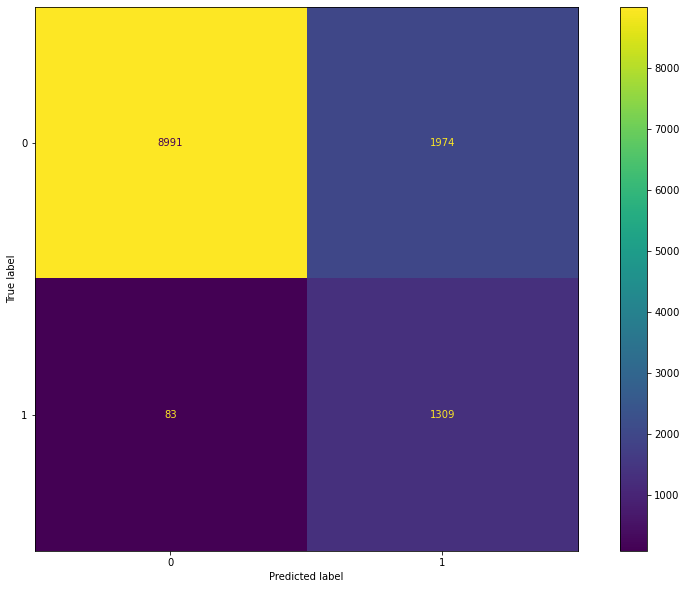

In [286]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_rf_ran,values_format='.5g');

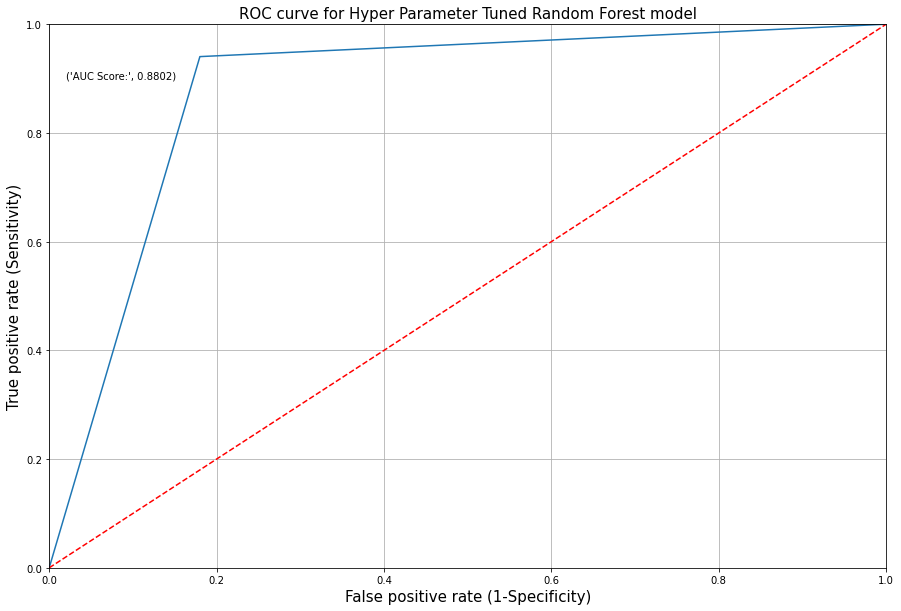

In [288]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_rf_ran)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Hyper Parameter Tuned Random Forest model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_rf_ran),4)))
plt.grid(True)


## Cross validation for Hyper parameter tuned Random Forest Model

In [289]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(rf_hyp,xtrain_s,ytrain_s,cv=kf,scoring='accuracy')
rf_hyp_be=np.mean(np.abs(cv_score))
rf_hyp_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of hyper parameter tuned Random Forest Model with all features',rf_hyp_be)
print('Variance_error of hyper parameter tuned Random Forest Model with all features',rf_hyp_ve)

Bias_error of hyper parameter tuned Random Forest Model with all features 0.6108564201740506
Variance_error of hyper parameter tuned Random Forest Model with all features 0.044265434264541104


## Hyper Parameter Tuning for Decision Tree Model

In [412]:
param_grid = {
    "min_samples_leaf": [10,20,30,40,50],
    'criterion' : ['gini', 'entropy'],
    "max_features": [np.arange(0.3, 0.9, 0.1),'sqrt','log2'],
    "max_depth":[2,3,4,5,6,7]
}
dt=DecisionTreeClassifier()
randomized_cv_dt=RandomizedSearchCV(estimator=dt,param_distributions=param_grid,scoring='accuracy',cv=5,random_state=5)

In [413]:
X = df.drop('y', axis=1)
y = df['y']
xtrain_s, xtest_s, ytrain_s, ytest_s = train_test_split(X, y, test_size=0.3, stratify=y, random_state=5)

In [388]:
random_cv_dt=randomized_cv_dt.fit(xtrain_s,ytrain_s)

In [238]:
random_cv_dt.best_params_

{'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'gini'}

In [414]:
dt_hyp=DecisionTreeClassifier(class_weight='balanced',min_samples_leaf=10,max_features='sqrt',max_depth=5,criterion='gini')

In [410]:
dt_hyp_model=dt_hyp.fit(xtrain_s,ytrain_s)

In [411]:
y_pred_dt_hyp=dt_hyp_model.predict(xtest_s)
print(classification_report(ytest_s,y_pred_dt_hyp))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88     10965
           1       0.37      0.92      0.53      1392

    accuracy                           0.81     12357
   macro avg       0.68      0.86      0.71     12357
weighted avg       0.92      0.81      0.84     12357



In [354]:
update_score_card(dt_hyp_model,'Decision Tree Model','Hyper-Parameter Tuning')

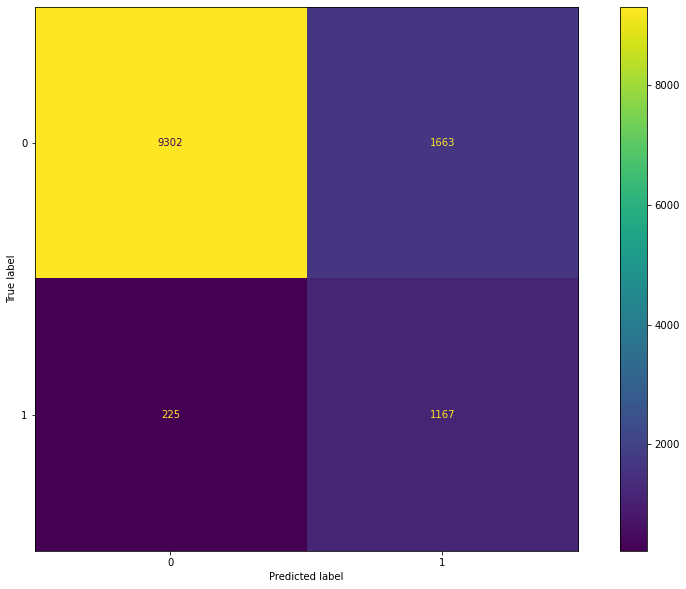

In [393]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_dt_hyp,values_format='.5g');

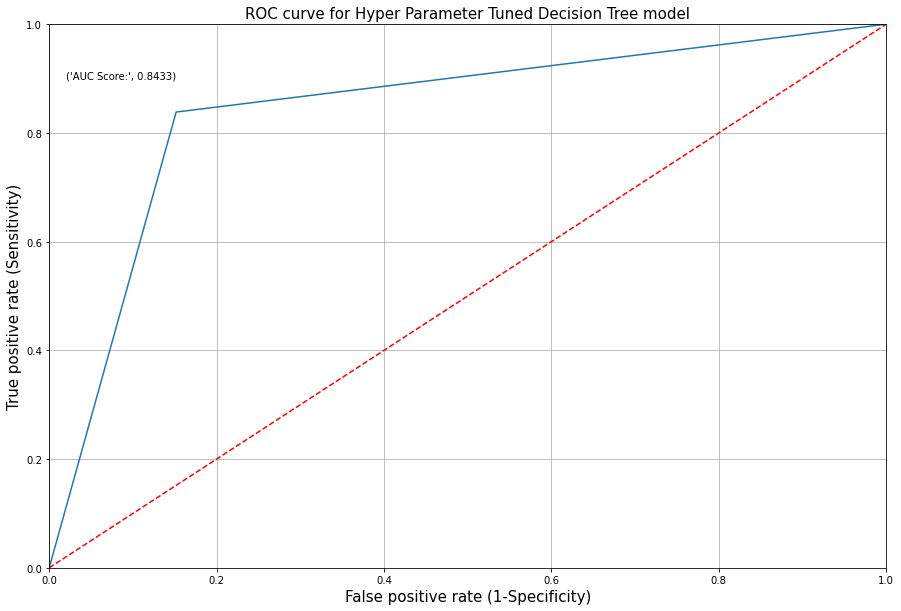

In [394]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_dt_hyp)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Hyper Parameter Tuned Decision Tree model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_dt_hyp),4)))
plt.grid(True)


## Cross validation for Hyper parameter tuned Decision Tree Model

In [297]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(dt_hyp ,xtrain_s,ytrain_s,cv=kf,scoring='accuracy')
dt_hyp_be=np.mean(np.abs(cv_score))
dt_hyp_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of Hyper parameter tuned Decision Tree Model with all features',dt_hyp_be)
print('Variance_error of Hyper parameter tuned Decision Tree Model with all features',dt_hyp_ve)

Bias_error of Hyper parameter tuned Decision Tree Model with all features 0.6585287475839745
Variance_error of Hyper parameter tuned Decision Tree Model with all features 0.5016888637749751


## Hyper Parameter Tuning for Bagging Classifier Model

In [395]:
param_grid = {'max_samples':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    "n_estimators": [10,20,30,40,50,60,70],
    "max_features": [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}
bag=BaggingClassifier()
randomized_cv_bag=RandomizedSearchCV(estimator=bag,param_distributions=param_grid,scoring='accuracy',cv=5,random_state=5)

In [396]:
X = df.drop('y', axis=1)
y = df['y']
xtrain_s, xtest_s, ytrain_s, ytest_s = train_test_split(X, y, test_size=0.3, stratify=y, random_state=5)
random_cv_bag=randomized_cv_bag.fit(xtrain_s,ytrain_s)

KeyboardInterrupt: 

In [245]:
random_cv_bag.best_params_

{'n_estimators': 30, 'max_samples': 0.7, 'max_features': 0.9}

In [397]:
bag_hyp=BaggingClassifier(n_estimators=30,max_samples=0.7,max_features=0.9)

In [398]:
bag_hyp_model=bag_hyp.fit(xtrain_s,ytrain_s)
y_pred_bag_hyp=bag_hyp_model.predict(xtest_s)
print(classification_report(ytest_s,y_pred_bag_hyp))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.67      0.46      0.55      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.72      0.75     12357
weighted avg       0.91      0.91      0.91     12357



In [355]:
update_score_card(bag_hyp_model,'Bagging Classifier Model','Hyper-Parameter Tuning')

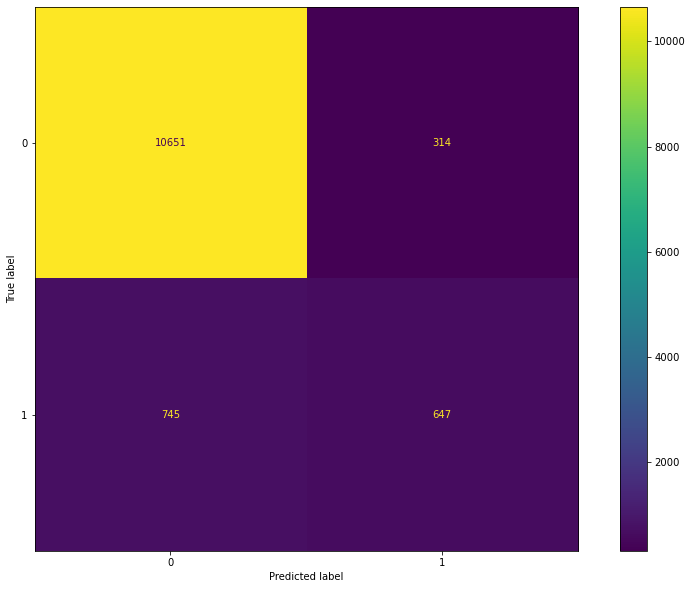

In [399]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_bag_hyp,values_format='.5g');

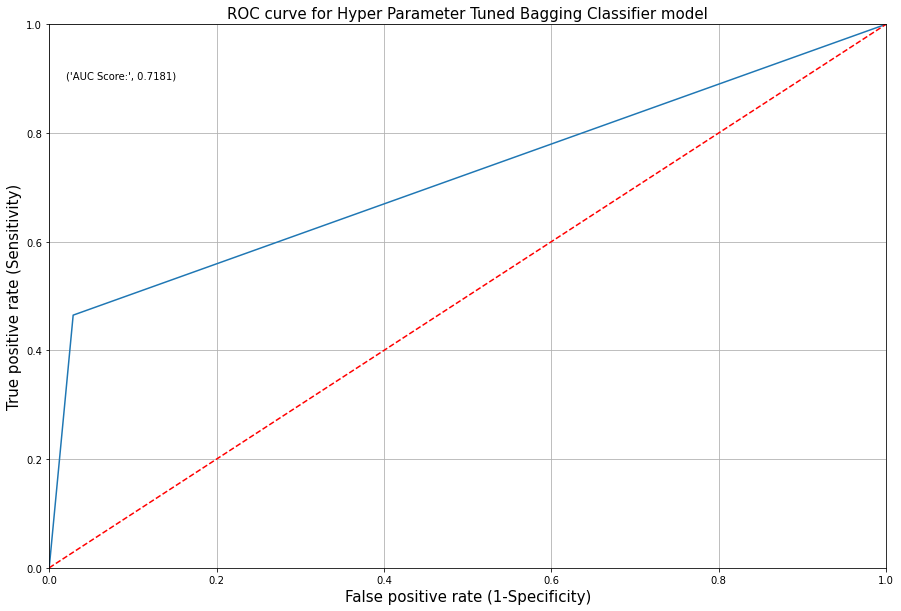

In [400]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_bag_hyp)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Hyper Parameter Tuned Bagging Classifier model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_bag_hyp),4)))
plt.grid(True)

## Cross validation for Hyper parameter tuned Bagging Classifier Model

In [301]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(bag_hyp,xtrain_s,ytrain_s,cv=kf,scoring='accuracy')
bag_hyp_be=np.mean(np.abs(cv_score))
bag_hyp_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of Hyper parameter tuned Bagging Classifier Model with all features',bag_hyp_be)
print('Variance_error of Hyper parameter tuned Bagging Classifier Model with all features',bag_hyp_ve)

Bias_error of Hyper parameter tuned Bagging Classifier Model with all features 0.11309763028041912
Variance_error of Hyper parameter tuned Bagging Classifier Model with all features 0.04828048517413615


## Feature Importance from Random Forest Model 

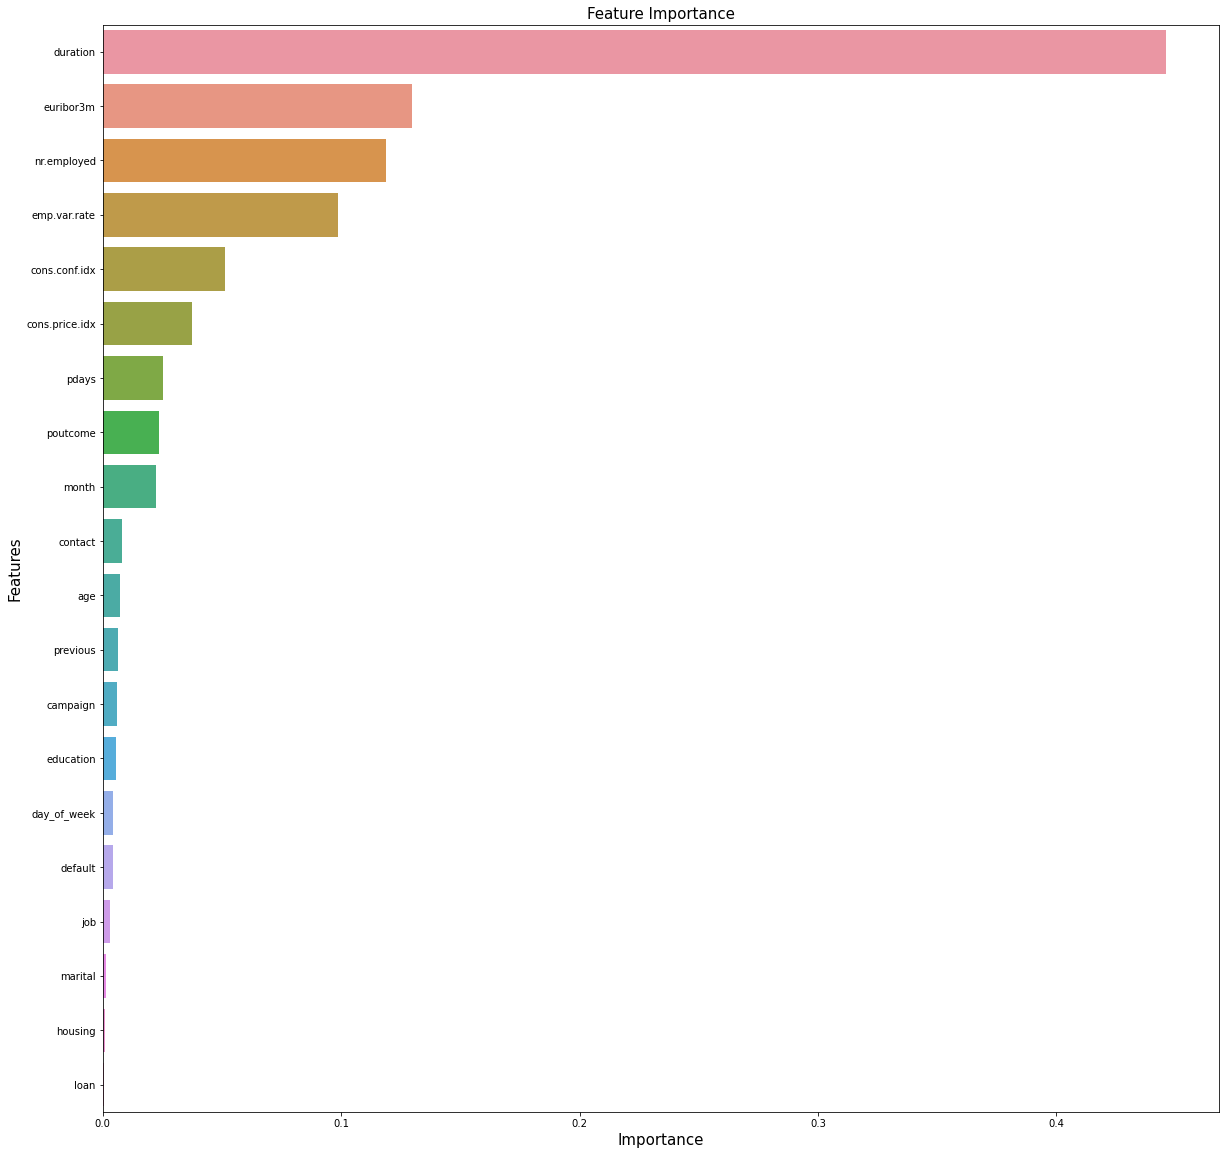

In [257]:
plt.figure(figsize=(20,20))

# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': xtrain_s.columns, 
                                   'Importance': rf_ran_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.rcParams['figure.figsize'] = (15,10)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

## So far RandomForest gives a good recall score of train 0.95 and test 0.95. So now let us see if we use feature engineered category columns and see how our model behaves  

## Feature Engineering

In [183]:
df=pd.read_csv("bank-additional-full.csv", sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


In [184]:
df1=df.copy()
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


## Feature Engineering the Age column

In [185]:
def age_imp(x):
    if (x<32):
        return 'youth'
    elif ((x>=32) and (x<50)):
        return 'adult'
    else:
        return 'senior'

In [186]:
df1.age = df1.age.apply(age_imp)
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,senior,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,senior,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,adult,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,adult,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,senior,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


## Feature Engineering the  Marital Column

In [187]:
df1.marital.value_counts(normalize=True)*100
#From the above we can infer that 0.19% unknown data which is tagged as 'unknown' 
#So in order to impute this data we are using mode imputation for the 'unknown' data

married    60.522482
single     28.085850
divorced   11.197436
unknown     0.194231
Name: marital, dtype: float64

In [188]:
df1.marital = df1.marital.replace({'unknown':'married'})
df1.marital.value_counts(normalize=True)*100

married    60.716714
single     28.085850
divorced   11.197436
Name: marital, dtype: float64

### Feature Engineering the Job Column

In [189]:
df1.job.value_counts(normalize=True)*100
#From the above we can infer that 0.8% unknown data which is tagged as 'unknown' 
#So in order to impute this data we are using logical imputation in which 
#we shall categorize the 'unknown' with respect to the education

admin.          25.303486
blue-collar     22.467709
technician      16.371273
services         9.636302
management       7.099155
retired          4.175974
entrepreneur     3.535010
self-employed    3.450034
housemaid        2.573565
unemployed       2.461882
student          2.124405
unknown          0.801204
Name: job, dtype: float64

In [190]:
pd.crosstab(df1.job,df1.education).style.background_gradient('Greens')

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [191]:
df1['job'][(df1['education']=='basic.4y') & (df1['job']=='unknown') ]='blue-collar'
df1['job'][(df1['education']=='basic.6y') & (df1['job']=='unknown') ]='blue-collar'
df1['job'][(df1['education']=='basic.9y') & (df1['job']=='unknown') ]='blue-collar'
df1['job'][(df1['education']=='high.school') & (df1['job']=='unknown') ]='admin.'
df1['job'][(df1['education']=='illiterate') & (df1['job']=='unknown') ]='blue-collar'
df1['job'][(df1['education']=='professional.course') & (df1['job']=='unknown') ]='technician'
df1['job'][(df1['education']=='university.degree') & (df1['job']=='unknown') ]='admin.'

In [193]:
pd.crosstab(df1.job,df1.education).style.background_gradient('Greens')

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3366,1,363,5798,249
blue-collar,2370,1448,3654,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [194]:
df1.job.value_counts(normalize=True)*100

admin.          25.502574
blue-collar     22.722638
technician      16.400408
services         9.636302
management       7.099155
retired          4.175974
entrepreneur     3.535010
self-employed    3.450034
housemaid        2.573565
unemployed       2.461882
student          2.124405
unknown          0.318054
Name: job, dtype: float64

In [195]:
df1.job = df1.job.replace({'unknown':'admin.'})   

In [196]:
df1.job.value_counts(normalize=True)*100

admin.          25.820627
blue-collar     22.722638
technician      16.400408
services         9.636302
management       7.099155
retired          4.175974
entrepreneur     3.535010
self-employed    3.450034
housemaid        2.573565
unemployed       2.461882
student          2.124405
Name: job, dtype: float64

In [197]:
df1.age.value_counts()

adult     23803
youth      9330
senior     8055
Name: age, dtype: int64

In [198]:
#Encoding the categorical data using Label Encoder
df1['age']  = LL.fit_transform(df1['age'])

In [199]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,1,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,0,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,1,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


In [201]:
df1_cat=df1.select_dtypes(include=object)

In [202]:
for i in df1_cat:
  df1[i] = LL.fit_transform(df1[[i]])

In [258]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.100,93.994,-36.400,4.857,5191.000,0
1,1,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.100,93.994,-36.400,4.857,5191.000,0
2,0,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.100,93.994,-36.400,4.857,5191.000,0
3,0,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.100,93.994,-36.400,4.857,5191.000,0
4,1,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.100,93.994,-36.400,4.857,5191.000,0


In [380]:
X = df1.drop('y', axis=1)
y = df1['y']
xtrain_f, xtest_f, ytrain_f, ytest_f = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

In [260]:
# Using the feature engineered data in Hyper parameter tuned Random forest model
rf_hyp_fea=RandomForestClassifier(n_estimators=100,class_weight='balanced',min_samples_leaf=30,max_features='sqrt',max_depth=7,criterion='entropy')

In [261]:
rf_hyp_fea_model=rf_hyp_fea.fit(xtrain_f,ytrain_f)

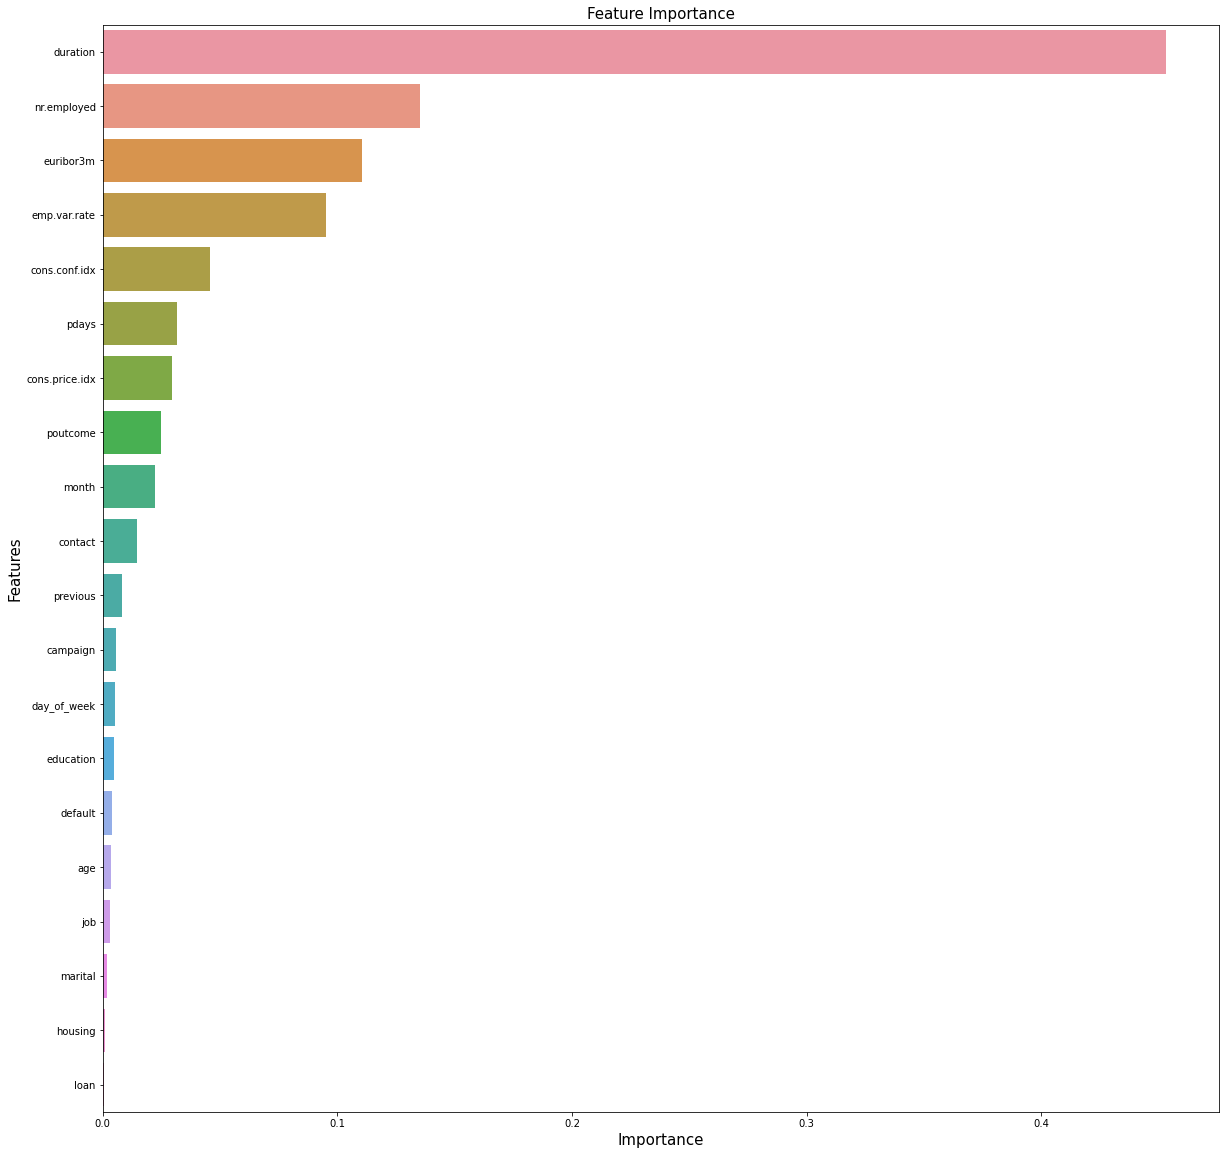

In [262]:
plt.figure(figsize=(20,20))

# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': xtrain_f.columns, 
                                   'Importance': rf_hyp_fea_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.rcParams['figure.figsize'] = (15,10)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

## Logistic Regression Model after Feature Engineering the attributes

In [381]:
SS = StandardScaler()

xtrain_fs = pd.DataFrame(SS.fit_transform(xtrain_f), columns= xtrain_f.columns, index= xtrain_f.index)
xtest_fs = pd.DataFrame(SS.transform(xtest_f), columns= xtest_f.columns, index= xtest_f.index)

In [382]:
Xcf_train=sm.add_constant(xtrain_fs)
Xcf_test=sm.add_constant(xtest_fs)

In [271]:
Xcf_train.head()

,const,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7707,1.000,1.647,-0.745,-0.279,-1.282,1.935,0.939,-0.450,1.314,0.756,-1.435,0.654,1.607,0.197,-0.351,0.193,0.650,0.722,0.886,0.717,0.334
32167,1.000,-0.782,1.510,1.380,0.590,-0.516,0.939,-0.450,-0.761,0.756,-1.435,-0.725,-0.569,0.197,-0.351,0.193,-1.197,-1.181,-1.228,-1.330,-0.937
7907,1.000,0.432,0.946,-0.279,-0.346,1.935,0.939,-0.450,1.314,-0.108,-0.719,0.473,-0.206,0.197,-0.351,0.193,0.841,1.535,-0.279,0.718,0.847
22058,1.000,-0.782,0.946,-0.279,-0.814,1.935,0.939,2.325,-0.761,-1.405,1.429,-0.740,0.519,0.197,-0.351,0.193,0.841,-0.229,0.951,0.775,0.847
10434,1.000,-0.782,1.510,1.380,-0.346,-0.516,-1.092,-0.450,1.314,-0.108,-0.719,0.523,0.157,0.197,-0.351,0.193,0.841,1.535,-0.279,0.773,0.847


In [383]:
logreg_feature=sm.Logit(ytrain_f,Xcf_train).fit()
logreg_feature.summary()

Optimization terminated successfully.
         Current function value: 0.212386
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28810
Method:                           MLE   Df Model:                           20
Date:                Wed, 12 Oct 2022   Pseudo R-squ.:                  0.3967
Time:                        16:27:38   Log-Likelihood:                -6123.3
converged:                       True   LL-Null:                       -10149.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.0807      0.036    -86.096      0.000      -3.151      -3.011
age                0.1202      0.024      4.915      0.000       0.072       0.168
job                0.0295      0.024      1.238      0.216      -0.017       0.076
marital         4.558e-05      0.025      0.002      0.999      -0.048       0.048
education          0.1211      0.025      4.828      0.000       0.072       0.170
default           -0.1446      0.032     -4.499      0.000      -0.208      -0.082
housing            0.0047      0.024      0.196      0.845      -0.042       0.052
loan              -0.0259      0.024     -1.068      0.286      -0.073       0.022
contact           -0.3316      0.037     -9.025      0.000      -0.404      -0.260
month             -0.2559      0.026     -9.847      0.000      -0.307      -0.205
day_of_week        0.0809      0.024      3.329      0.001       0.033       0.128
duration           1.2004      0.023     52.751      0.000       1.156       1.245
campaign          -0.0587      0.037     -1.579      0.114      -0.131       0.014
pdays             -0.1795      0.035     -5.122      0.000      -0.248      -0.111
previous          -0.0254      0.033     -0.776      0.437      -0.090       0.039
poutcome           0.1752      0.033      5.346      0.000       0.111       0.239
emp.var.rate      -1.3726      0.129    -10.630      0.000      -1.626      -1.119
cons.price.idx     0.3263      0.083      3.917      0.000       0.163       0.490
cons.conf.idx      0.0726      0.038      1.934      0.053      -0.001       0.146
euribor3m          1.2037      0.213      5.663      0.000       0.787       1.620
nr.employed       -1.0566      0.159     -6.630      0.000      -1.369      -0.744
==================================================================================
"""

In [265]:
print("AIC",logreg_feature.aic)

AIC 12346.586336484028


In [384]:
df_odds_feature = pd.DataFrame(np.exp(logreg_feature.params), columns= ['Odds']) 

# print the dataframe
df_odds_feature
df_odds_feature.sort_values('Odds',ascending= False)

,Odds
euribor3m,3.333
duration,3.321
cons.price.idx,1.386
poutcome,1.191
education,1.129
age,1.128
day_of_week,1.084
cons.conf.idx,1.075
job,1.030
housing,1.005


### Inference:
- From the above model we can see that the featured engineered columns have no impact, so as we saw earlier Random Forest gave good recall score so lets try hyper tunning the boosting as check if the recall increases further

## Sequential Forward Selection(sfs) for best features

In [ ]:
dont run
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
rf=RandomForestClassifier()
sfs = SFS(rf,
          k_features= 'best',
          forward=True,
          floating=False,
          scoring = 'recall',
          cv = 5)

sfs_model = sfs.fit(xtrain_s, ytrain_s)
print('The best features for Logistic Model is',sfs.k_feature_names_)

# Models using the Best Features

In [82]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,0.390,-1.045,2,0,1,1.100,93.994,-36.400,4.857,0.141
1,57,7,1,3,1,0,0,1,6,1,-0.235,-1.045,2,0,1,1.100,93.994,-36.400,4.857,0.141
2,37,7,1,3,0,2,0,1,6,1,0.225,-1.045,2,0,1,1.100,93.994,-36.400,4.857,0.141
3,40,0,1,1,0,0,0,1,6,1,-0.220,-1.045,2,0,1,1.100,93.994,-36.400,4.857,0.141
4,56,7,1,3,0,0,2,1,6,1,0.579,-1.045,2,0,1,1.100,93.994,-36.400,4.857,0.141


In [423]:
x_b=X[['age', 'contact', 'month', 'day_of_week', 'duration', 'pdays', 'previous', 'euribor3m', 'nr.employed']]
y = df['y']
xtrain_s, xtest_s, ytrain_s, ytest_s = train_test_split(x_b, y, test_size=0.3, stratify=y, random_state=5)

## Decision Tree using best Features

In [403]:
decision_tree_classification_S_b = DecisionTreeClassifier(random_state = 5)
decision_tree_s_b_dt = decision_tree_classification_S_b.fit(xtrain_s, ytrain_s)


In [404]:
y_pred_s_b_dt = decision_tree_s_b_dt.predict(xtest_s)
print(classification_report(ytest_s,y_pred_s_b_dt))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10965
           1       0.52      0.52      0.52      1392

    accuracy                           0.89     12357
   macro avg       0.73      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357



In [360]:
update_score_card(decision_tree_s_b_dt,'Decision Tree Model','Best Features')

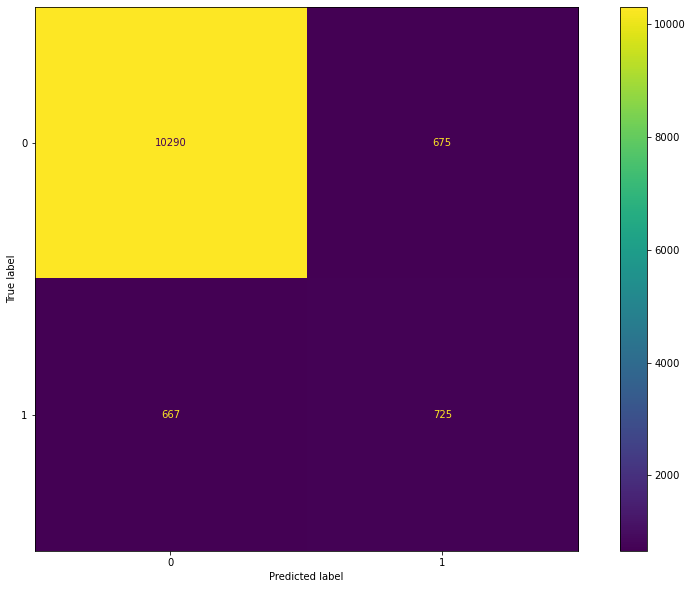

In [405]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_b_dt,values_format='.5g');


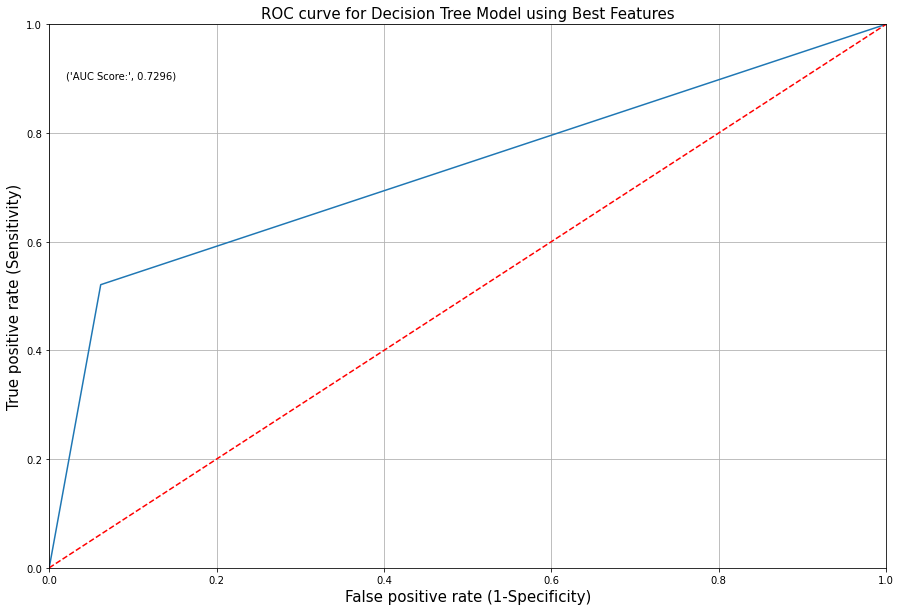

In [406]:
fpr, tpr, thresholds = roc_curve(ytest_s,y_pred_s_b_dt)
# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Decision Tree Model using Best Features', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_b_dt),4)))
                               
# plot the grid
plt.grid(True)

In [302]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(decision_tree_classification_S_b,xtrain_s,ytrain_s,cv=kf,scoring='accuracy')
dtb_be=np.mean(np.abs(cv_score))
dtb_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of Decision Tree model using best features',dtb_be)
print('Variance_error of Decision Tree model using best features',dtb_ve)

Bias_error of Decision Tree model using best features 0.10950320465086265
Variance_error of Decision Tree model using best features 0.015057146824576829


## Random forest Model using Best Parameters

In [361]:
rf_classification_s_b = RandomForestClassifier(random_state = 5)
rf_model_b = rf_classification_s_b.fit(xtrain_s, ytrain_s)

In [90]:
y_pred_s_b_rf = rf_model_b.predict(xtest_s)
print(classification_report(ytest_s,y_pred_s_b_rf))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.62      0.53      0.57      1392

    accuracy                           0.91     12357
   macro avg       0.78      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357



In [362]:
update_score_card(rf_model_b,'Random Forest Model','Best Features')

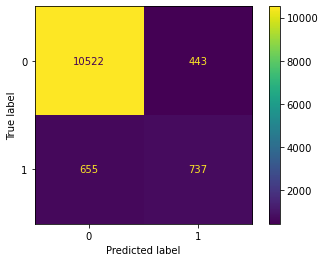

In [92]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_b_rf);


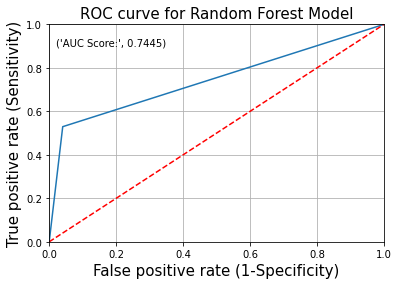

In [93]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_s_b_rf)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Random Forest Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_b_rf),4)))
plt.grid(True)

In [303]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(rf_classification_s_b,xtrain_s,ytrain_s,cv=kf,scoring='accuracy')
rfb_be=np.mean(np.abs(cv_score))
rfb_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of Random Forest model using best features',rfb_be)
print('Variance_error of Random Forest model using best features',rfb_ve)

Bias_error of Random Forest model using best features 0.136712972776674
Variance_error of Random Forest model using best features 0.04645737174201168


## KNN model using best parameters




In [416]:
knn_classification = KNeighborsClassifier()
knn_model_s_b = knn_classification.fit(xtrain_s, ytrain_s)

In [417]:
y_pred_s_b_kn = knn_model_s_b.predict(xtest_s)
print(classification_report(ytest_s,y_pred_s_b_kn))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10965
           1       0.56      0.30      0.39      1392

    accuracy                           0.89     12357
   macro avg       0.74      0.64      0.67     12357
weighted avg       0.88      0.89      0.88     12357



In [364]:
update_score_card(knn_model_s_b,'KNN Model','Best Features')

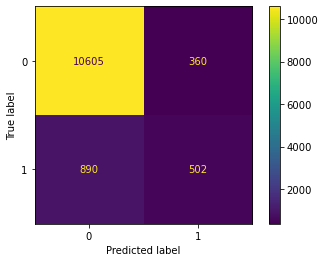

In [97]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_b_kn);

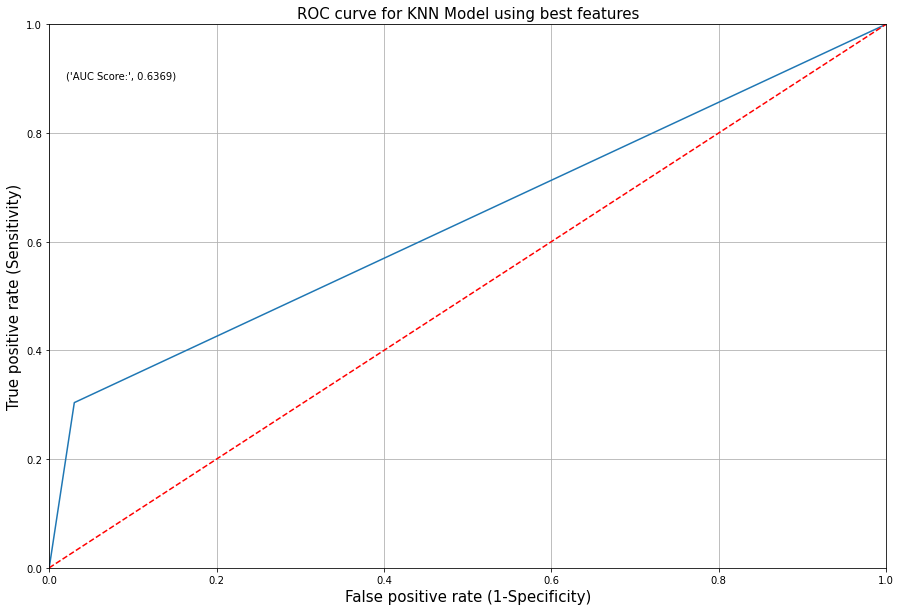

In [418]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_s_b_kn)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for KNN Model using best features', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_b_kn),4)))
plt.grid(True)

In [304]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(knn_classification,xtrain_s,ytrain_s,cv=kf,scoring='accuracy')
knnb_be=np.mean(np.abs(cv_score))
knnb_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of KNN model using best features',knnb_be)
print('Variance_error of KNN model using best features',knnb_ve)

Bias_error of KNN model using best features 0.08265917621114571
Variance_error of KNN model using best features 0.025427357360661186


## Naive Bayes Model using Best Paramaters

In [365]:
gnb = GaussianNB()
gnb_model_b = gnb.fit(xtrain_s, ytrain_s)

In [100]:
y_pred_s_b_nb = knn_model_s_b.predict(xtest_s)
print(classification_report(ytest_s,y_pred_s_b_nb))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10965
           1       0.58      0.36      0.45      1392

    accuracy                           0.90     12357
   macro avg       0.75      0.66      0.69     12357
weighted avg       0.88      0.90      0.89     12357



In [366]:
update_score_card(gnb_model_b,'Naive Bayes Model','Best Features')

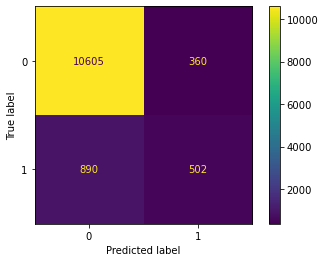

In [102]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_b_nb);

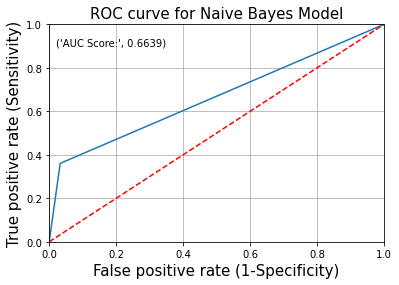

In [103]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_s_b_nb)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Naive Bayes Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_b_nb),4)))
plt.grid(True)


In [305]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(gnb,xtrain_s,ytrain_s,cv=kf,scoring='accuracy')
nbb_be=np.mean(np.abs(cv_score))
nbb_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of Naive Bayes using best features',nbb_be)
print('Variance_error of Naive Bayes using best features',nbb_ve)

Bias_error of Naive Bayes using best features 0.5735645164330107
Variance_error of Naive Bayes using best features 0.03959942376788513


## Ada boost Model using Best Parameters

In [ ]:
ada_b = AdaBoostClassifier(random_state = 5)
ada_model_b=ada_b.fit(xtrain_s, ytrain_s)
y_pred_s_b_ad = ada_model_b.predict(xtest_s)
print(classification_report(ytest_s,y_pred_s_b_ad))

In [367]:
ada_b = AdaBoostClassifier(random_state = 5)
ada_model_b=ada_b.fit(xtrain_s, ytrain_s)

In [105]:
y_pred_s_b_ad = ada_model_b.predict(xtest_s)
print(classification_report(ytest_s,y_pred_s_b_ad))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10965
           1       0.67      0.38      0.49      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



In [368]:
update_score_card(ada_model_b,'Ada Boost Model','Best Features')

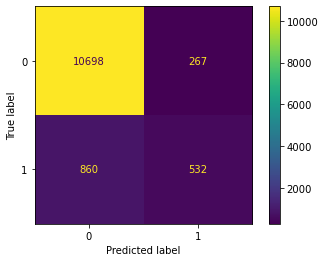

In [107]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_b_ad);

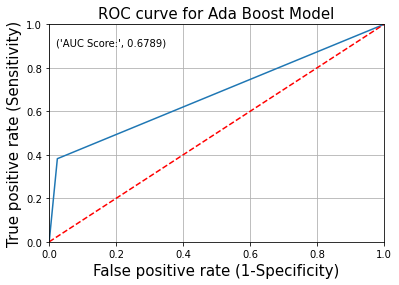

In [108]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_s_b_ad)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Ada Boost Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_b_ad),4)))
plt.grid(True)


In [306]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(ada_b,xtrain_s,ytrain_s,cv=kf,scoring='accuracy')
adab_be=np.mean(np.abs(cv_score))
adab_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of Ada Boost model using best features',adab_be)
print('Variance_error of Ada Boost model using best features',adab_ve)

Bias_error of Ada Boost model using best features 0.08714982831528248
Variance_error of Ada Boost model using best features 0.021199464975792278


## Xg boost Model using Best Parameters



In [ ]:
xgb_b = XGBClassifier()
xgb_model_b=xgb_b.fit(xtrain_s, ytrain_s)
y_pred_s_b_xg = xgb_model_b.predict(xtest_s)
print(classification_report(ytest_s,y_pred_s_b_xg))

In [369]:
xgb_b = XGBClassifier()
xgb_model_b=xgb_b.fit(xtrain_s, ytrain_s)

In [110]:
y_pred_s_b_xg = xgb_model_b.predict(xtest_s)
print(classification_report(ytest_s,y_pred_s_b_xg))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.65      0.54      0.59      1392

    accuracy                           0.91     12357
   macro avg       0.79      0.75      0.77     12357
weighted avg       0.91      0.91      0.91     12357



In [370]:
update_score_card(xgb_model_b,'XG Boost Model','Best Features')

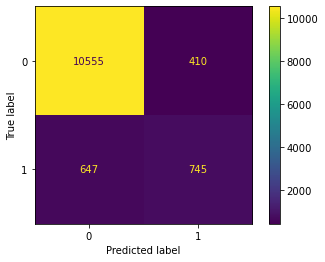

In [112]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_b_xg);

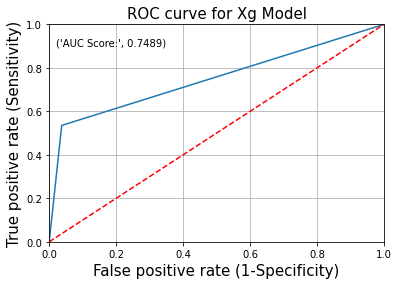

In [113]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_s_b_xg)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Xg Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_b_xg),4)))
plt.grid(True)

In [307]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(xgb_b ,xtrain_s,ytrain_s,cv=kf,scoring='accuracy')
xgb_be=np.mean(np.abs(cv_score))
xgb_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of XG Boost model using best features',xgb_be)
print('Variance_error of XG Boost model using best features',xgb_ve)

Bias_error of XG Boost model using best features 0.12771679535182678
Variance_error of XG Boost model using best features 0.0580177430014027


## Gradient boosting using Best parameters

In [ ]:
gboost_b = GradientBoostingClassifier(random_state = 5)
gboost_model_b=gboost_b.fit(xtrain_s, ytrain_s)
y_pred_s_b_g = gboost_model_b.predict(xtest_s)
print(classification_report(ytest_s,y_pred_s_b_g))

In [371]:
gboost_b = GradientBoostingClassifier(random_state = 5)
gboost_model_b=gboost_b.fit(xtrain_s, ytrain_s)

In [115]:
y_pred_s_b_g = gboost_model_b.predict(xtest_s)
print(classification_report(ytest_s,y_pred_s_b_g))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.68      0.52      0.59      1392

    accuracy                           0.92     12357
   macro avg       0.81      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



In [372]:
update_score_card(gboost_model_b,'Gradient Boost Model','Best Features')

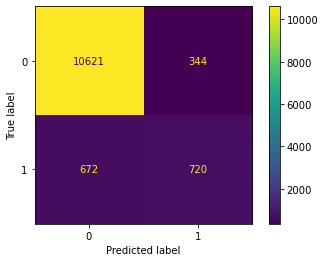

In [117]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_b_g);

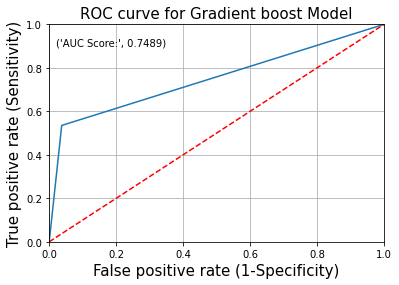

In [118]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_s_b_xg)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Gradient boost Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_b_xg),4)))
plt.grid(True)

In [308]:
kf=KFold(n_splits=5,shuffle=True,random_state=5)
cv_score=cross_val_score(gboost_b,xtrain_s,ytrain_s,cv=kf,scoring='accuracy')
gbb_be=np.mean(np.abs(cv_score))
gbb_ve=np.std(np.abs(cv_score),ddof=1)
print('Bias_error of Gradient Boost model using best features',gbb_be)
print('Variance_error of Gradient Boost model using best features',gbb_ve)

Bias_error of Gradient Boost model using best features 0.15744724366382506
Variance_error of Gradient Boost model using best features 0.03436142066737353


## Bagging Classifier Model using Best Features

In [420]:
bag_classification_b = BaggingClassifier(random_state = 5)
bag_model_b = bag_classification_b.fit(xtrain_s, ytrain_s)
y_pred_s_bag_best = bag_model_b.predict(xtest_s)
print(classification_report(ytest_s,y_pred_s_bag_best))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.61      0.49      0.54      1392

    accuracy                           0.91     12357
   macro avg       0.77      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357



In [424]:
update_score_card(bag_model_b,'Bagging Classifier Model','Best Features')

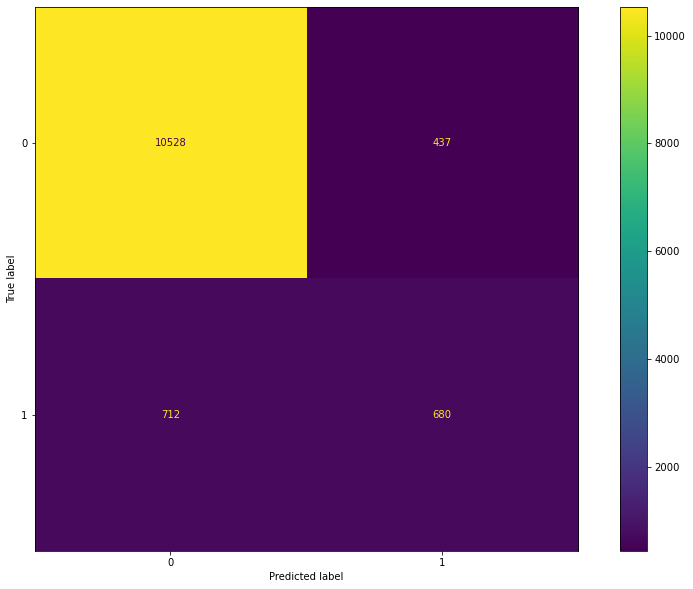

In [421]:
ConfusionMatrixDisplay.from_predictions(ytest_s,y_pred_s_bag_best);

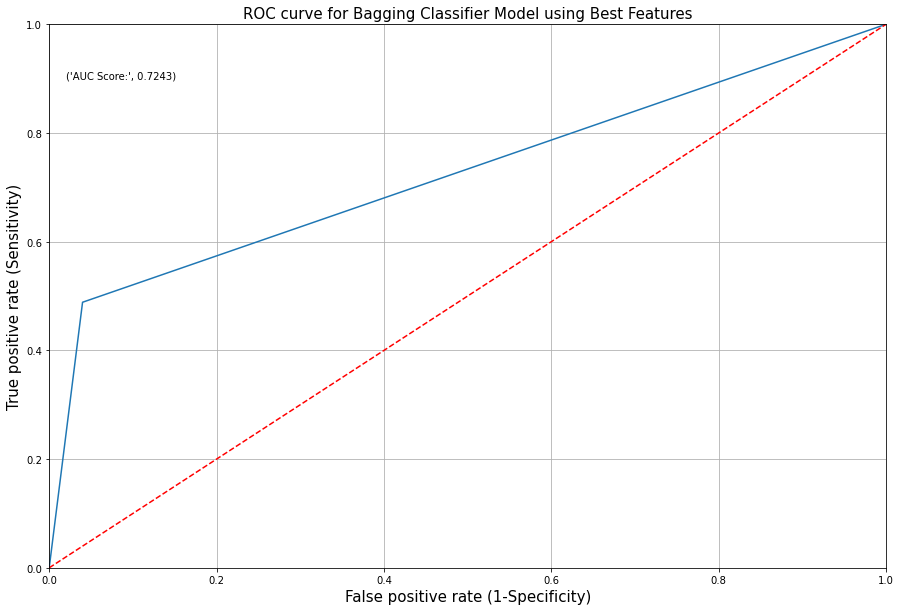

In [422]:
fpr, tpr, thresholds = roc_curve(ytest_s, y_pred_s_bag_best)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Bagging Classifier Model using Best Features', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(ytest_s, y_pred_s_bag_best),4)))
plt.grid(True)

In [ ]:
# Considering the recall metric, Random forest model with all features using Hyper parameter tuning performs better

In [373]:
score_card

,Model,Approach,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression_Base Model,All Features,0.703,0.327,0.909,0.404,0.446
1,Decison Tree,All Features,0.721,0.725,0.888,0.446,0.723
2,Random Forest,All Features,0.803,0.738,0.916,0.531,0.765
3,KNN Model,All Features,0.740,0.637,0.895,0.343,0.669
4,Naive Bayes Model,All Features,0.663,0.723,0.850,0.372,0.684
5,Ada Boost Model,All Features,0.799,0.686,0.910,0.452,0.724
6,XG Boost Model,All Features,0.789,0.752,0.913,0.538,0.769
7,Gradient Boost Model,All Features,0.804,0.740,0.916,0.534,0.766
8,Bagging Classifier Model,All Features,0.776,0.721,0.908,0.489,0.744
9,Random Forest Model,Hyper-Parameter Tuning,0.695,0.881,0.834,0.478,0.729


In [425]:
score_card

,Model,Approach,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression_Base Model,All Features,0.703,0.327,0.909,0.404,0.446
1,Decison Tree,All Features,0.721,0.725,0.888,0.446,0.723
2,Random Forest,All Features,0.803,0.738,0.916,0.531,0.765
3,KNN Model,All Features,0.740,0.637,0.895,0.343,0.669
4,Naive Bayes Model,All Features,0.663,0.723,0.850,0.372,0.684
5,Ada Boost Model,All Features,0.799,0.686,0.910,0.452,0.724
6,XG Boost Model,All Features,0.789,0.752,0.913,0.538,0.769
7,Gradient Boost Model,All Features,0.804,0.740,0.916,0.534,0.766
8,Bagging Classifier Model,All Features,0.776,0.721,0.908,0.489,0.744
9,Random Forest Model,Hyper-Parameter Tuning,0.695,0.881,0.834,0.478,0.729
